# Assessment of Integrated MV-LV OE Calculations to Orchestrate DERs 
# OE Algorithm 1: Ideal

## 1. Introduction
This repository is part of the project [Accelerating the Implementation of Operating Envelopes Across Australia](https://electrical.eng.unimelb.edu.au/power-energy/projects/accelerating-the-implementation-of-operating-envelopes-across-australia) funded by CSIRO. This project provided key metrics, recommendations, and guidance for distribution companies (known as Distribution Network Service Providers [DNSPs] in Australia) and AEMO (the Australian system operator) to assist them in improving and, hence, accelerating the use of Operating Envelopes (OEs) across Australia.

> <span style="color:purple">**What are Operating Envelopes (OEs)?** OEs are time-varying export or import limits calculated in real time or in advance at the connection point of the customer to ensure the integrity of the distribution network (i.e., customer voltages within limits and no asset congestion). The OEs are calculated only for customers with flexible connection agreements (called here *flexible customers*). Customers with conventional connection agreements (called here *fixed customers*) do not require OEs.</span>

**This interactive notebook demonstrates the process to implement the *Ideal OE Algorithm with Integrated MV-LV Calculations*** produced by The University of Melbourne. This demonstration is useful for different stakeholders (e.g., DNSPs, AEMO, CSIRO, regulators, consultancy companies, technology providers) as it can help them familiarise with the corresponding algorithm and the required inputs as well as the pros and cons.

> <span style="color:purple">The **Ideal OE with Integrated MV-LV Calculations** is the most advanced and, hence, the most accurate OE approach as it uses power flows to carry out calculations. However, it needs a full MV-LV electrical network model, full monitoring of customers, and monitoring at the MV head of feeders, which make its implementation complex and likely impractical. But if the electrical model and monitoring data are all correct, this approach can produce OEs for flexible customers that can ensure the adequate operation of the MV-LV network within technical limits (i.e., voltage and thermal). Therefore, this operating envelope is used as a benchmark for the simpler ones studied in the project.</span>
> - Monitoring: At MV head of feeders (P, Q, and V, all per phase), at all customers (net demand P and Q).
> - Electrical models: Full three-phase integrated MV-LV electrical network model.

## 2. Algorithm Overview
The **Ideal OE with Integrated MV-LV Calculations** uses a perfect electrical network model of a given MV-LV network together with the time-varying input data from the network and customers to carry out heuristic algorithms. These algorithms consist of a series of power flows calculations with a decreasing OE value – starting from a predefined maximum OE, which is usually limited by the customer connection agreement – applied to all flexible customers. This OE value is decreased until the MV and LV networks do not present any thermal or voltage problems, at this point the OE value was found. The proportional allocation technique is used in this project, as presented below. Note that for calculations in advance (e.g., hours ahead), forecasting capabilities are also needed (however, here, perfect forecasting is used for simplicity).

For a given point in time (e.g., at 12:00PM), the high-level steps of the algorithm are as follows:
1. **Set up the electrical network for power flow simulations for OE exports (or OE imports)**. This is done by using the integrated MV-LV electrical network model together with the voltage at the MV head of feeder and the net demand from fixed customers (P, Q) and flexible customers (Q). Also set the net active power of each flexible customer to the maximum possible value for OE export (or OE import). Since it is a proportional allocation, for OE exports, the maximum possible OE value is the installed capacity of DERs located in each flexible customer. In case the DER installed capacity is higher than the customer connection agreement (e.g., 10kW maximum export per phase), the value stablished by the customer connection agreement is used instead. For OE imports, the fuse of the flexible customer (e.g., 60A fuse for a single-phase customer, giving a total power of 14kW) is used as the maximum possible OE value.
2. **Run the power flow**.
3. **Check for voltage and thermal issues in the whole network for the OE exports (or OE imports)**. If any network limit is breached (voltage or thermal), proportionally reduce the net active power of all flexible customers by a pre-defined value (e.g., 1% of the maximum possible OE), then go back to step 2. Otherwise, the current net active power of flexible customers correspond to the OE exports (or OE imports), thus proceed to step 4.
4. **Move to the next time step (e.g., 12:05PM) and restart the process from 1**.

<span style="color:red">**<u>Note 1</u>.</span>** The OE exports and OE imports are calculated separately. When calculating exports, all flexible customers are considered to export. When calculating imports, all flexible customers are considered to import. This ensures the asset integrity even if all flexible customers operate at their maximum allocated OE capacity (worst case scenario).

<span style="color:red">**<u>Note 2</u>.</span>** For OE calculations in real-time no forecast is needed, real-time measurements from the network and customers should be used instead.

<span style="color:red">**<u>Note 3</u>.</span>** The OE values are calculated for the active power only. The reactive power of PV systems are considered to be zero all the time.

## 3. Inputs and Outputs for the OE Calculation Algorithm
### Time-Varying Inputs
- Forecasted voltage magnitude at the MV head of feeder.
- Forecasted net demand (P, Q) of all fixed customer.
- Forecasted net demand (Q) of all flexible customers.

### Static Inputs
- Accurate full electrical model of the integrated MV-LV network (i.e., topology, phase connection of assets and customers, and impedance of conductors).
- Rated capacity of the primary substation and distribution transformer, as well as of MV and LV lines.

### Outputs
- The OE values for exports or imports. 

## 4. Test MV-LV Network
A real 22kV MV feeder from Victoria, Australia, with 79 distribution transformers is used to demonstrate the OE algorithm, as shown in Figure 1. This integrated MV-LV network has the following characteristics:
- One 3-phase MV feeder (22kV)
- 79 distribution transformers (22kV/0.433kV)
- 3,374 single-phase-connected residential customers (distributed along 70 distribution transformers)
- 9 C&I customers (on the other 9 distribution transformers)

The following scenario is considered:
- 1,856 residential customers (~55% of total) are considered fixed customers without PV systems.
- 1,012 residential customers (~30% of total) are considered fixed customers with PV systems.
- 506 residential customers (~15% of total) are flexible customers.
- Fixed customers with PV systems have installed capacity ranging from 1.25kVA to 11.75kVA (based on Australian stats from 2020-2022). Their PV systems also have the combined Volt-Watt and Volt-Var functions enabled (as per Australian Standards).
- Flexible customers have PV systems with installed capacity ranging from 1.25kVA to 11.75kVA (based on Australian stats from 2022-2023).
- Customer demands and PV irradiance are from the summer of 2014 in Victoria, Australia.
- The simulation is carried out for three days.

<span style="color:red">**<u>Note</u>.</span>** To speed up the simulation, the default of the code is to simulate only 2h of the first day. This can be changed to the original three complete days if you want, just follow the instructions along the Jupyter notebook.

<img style="float: middle;" src="MV_feeder.SVG" width="100%">

**<center>Figure 1. 22kV MV feeder with 79 distribution transformers</center>**

## 5. Interactive Code
<span style="color:red">**<u>Note 1</u>.</span>** This interactive notebook is designed to facilitate the learning/teaching of the content. Therefore, the definitions of functions are not made at the beginning of the notebook as it is usually done when just coding.

<span style="color:red">**<u>Note 2</u>.</span>** We suggest you to turn online numbers for your Jupyter notebook. To do so, in the Jupyter notebook menu (top of the page), click on "View", then click on "Toggle Line Numbers". This will be useful for instructions to come.

### 5.1. Initialisation of Libraries

In case of an error in the following code cell, verify the requirements of the project and run the cell again.

In [1]:
import os, subprocess 
from matplotlib import pyplot as plt # for plotting
import numpy as np # for numerical calculations

In the next code cell, the OpenDSS library is imported. It contains a validation in case the code is run in Google Colab.

In [2]:
# Verify if the variable to set the environment in Google Colab exists
added_path = ""
if os.getenv("COLAB_RELEASE_TAG"):
    print(subprocess.check_output('pip install dss-python', shell=True).decode())
    ! git clone --depth=1 -q https://github.com/aavilarojas28/OE_algorithms
    added_path = '/OE_algorithms/OE-MV-LV/OE1-Ideal_Integrated_MV-LV_Calculation-main'
    
    
# Import library
import dss # for OpenDSS

### 5.2. Get Directory and Initialise OpenDSS

In [3]:
# Initialise the OpenDSS (this allows to run the power flows later)
dss_engine = dss.DSS
dss_text = dss_engine.Text                                                      
dss_circuit = dss_engine.ActiveCircuit                                            
dss_solution = dss_engine.ActiveCircuit.Solution                                      
control_queue = dss_engine.ActiveCircuit.CtrlQueue                                          
dss_engine.AllowForms = 0

### 5.3. Load/Prepare Necessary Inputs
Load the necessary inputs to calculate the Ideal OE.

In [4]:
# Get directory location
mydir = os.getcwd()

time_resolution = 5 # Define time resolution of the data in minute
# Define number of time steps in the day (1440 minutes in a day) for the corresponding time resolution
num_time_steps = int(1440/time_resolution)
num_distr_tx = 79 # Set number of distribution transformers
num_days = 3 # Set number of days to be simulated

max_voltage_limit = 253 # max voltage limit in V
min_voltage_limit = 216 # min voltage limit in V
max_export_limit = 10 # max export limit in kW
max_import_limit = 14 # max import limit in kW

# Name of all flexible customers in the integrated MV-LV network
flex_cust_names = np.load(mydir + added_path + '/simulation_files/scenario/scenario2_all_flex_cust_names.npy', allow_pickle=True) 

# Name of all flexible customers in the integrated MV-LV networks separated by LV network
flex_cust_names_per_lv = np.load(mydir + added_path + '/simulation_files/scenario/scenario2_flex_cust_names.npy', allow_pickle=True) 

# Capacity of each distribution transformer of the integrated MV-LV networks separated by LV network
lvtx_capacity = np.load(mydir + added_path + '/simulation_files/lvtx_capacity.npy')   

# DER size of all flexible customers in the integrated MV-LV networks separated by LV network
flex_cust_der_size = np.load(mydir + added_path + '/simulation_files/scenario/scenario2_lv_flex_cust_der_size.npy', allow_pickle=True)

### 5.4. Create Functions for the Ideal OE Algorithms
#### OEs for Exports with Proportional Allocation
<span style="color:red">**<u>Note 1</u>.</span>** The calculation of the Ideal OE for exports considering the original OE reduction step of 1% (as used in the report) can take a long time to simulate. Therefore, below we present a code that has 20% for the OE reduction step as default. We recommend that you use the default code first, before moving to a longer simulation.

<span style="color:red">**<u>Note 2</u>.</span>** You can update the OE reduction step back to the original 1% (or any other percentage) by changing the parameter "oe_step_size" as explained in the code cell below in the lines 46-51.

#### 5.4.1. Function to calculate the Ideal OE proportional allocation for exports/imports
This function is used for all the cases evaluated in this notebook.

In [5]:
def ideal_oe_prop_algorithm(
        network_info: dict,
        direction = 'exports',
        oe_step_size = 0.20
):
    """
    Function to calculate the Ideal OE proportional allocation for exports/imports in each time step.
    :param network_info: it contains the data of the integrated MV-LV network. Lines, load, and distribution transformers names are in this dictionary
    :param direction: 'exports' or 'imports'
    :param oe_step_size: 20% reduction; if you want to test a different reduction step, choose a number between 0 and 1
    :return: the ideal OE for exports/imports in each time step
    """
    
    # ---------------- Initialise inputs ----------------
    oe_percent = [1] * len(flex_cust_der_size) # each flexible customer starts with an OE with the size of the corresponding DER size  
    line_names = network_info['line_names']
    load_names = network_info['load_names']
    tx_names = network_info['tx_names']
    
    # Count number of LV lines (all LV networks together) and number of MV lines
    num_mv_lines = sum(1 for line in line_names if len(line.split('_')) == 3) # in the case of MV lines, the name is in the format "n1_n2_n3"
            
    # ---------------- Initial Allocation ----------------
    # Allocate the maximum possible OE exports at the connection point of each flexible customer
    # Since it is assumed that the Distribution Operator has the knowledge of flexible customers' DER sizes, it is used to make a proportional OE allocation that will not pass the DER size
    alloc_p_temp = [[]] * len(flex_cust_der_size)
    for der_size in range(len(flex_cust_der_size)):
        if any(flex_cust_der_size[der_size]):
            alloc_p_temp[der_size] = np.zeros(len(flex_cust_der_size[der_size]), float)
            for ild in range(len(flex_cust_der_size[der_size])):      
                if direction == 'exports':
                    alloc_p_temp[der_size][ild] = flex_cust_der_size[der_size][ild]
                    if alloc_p_temp[der_size][ild] > max_export_limit:
                        alloc_p_temp[der_size][ild] = max_export_limit # maximum allowed OE value for exports/imports per phase
                else:
                    alloc_p_temp[der_size][ild] = max_import_limit
                    
                    
    # ---------------- Deactivate PV system element of flexible customers ----------------
    # OE export is going to be modelled as negative load later
    for flex_cust in flex_cust_names:
        dss_circuit.SetActiveElement(f'pvsystem.pv_{str(flex_cust)}') # select a flexible customer
        dss_circuit.ActiveElement.Properties('enabled').Val = 'false' # turn off the PV system in OpenDSS
        
    # ---------------- Iteratively run Power Flow Calculations ----------------
    # The OE export/import is initialise with the maximum possible value then is it gradually reduced until no more technical issues occur
    flag = 0 # Overall flag to indicate if the integrated MV-LV network have technical issues (0 = problems; 1 = no problems)
    while flag == 0:
        # ---------------- Use the allocated OE value to each flexible customer ----------------
        for ilv_net in range(len(flex_cust_names_per_lv)): # for each LV network in the integrated MV-LV flex_cust_names_per_lv:
            current_lv_net = flex_cust_names_per_lv[ilv_net]
            if any(current_lv_net):
                for ild in range(len(current_lv_net)):
                    dss_circuit.SetActiveElement('load.' + current_lv_net[ild]) # select a flexible customer
                    reactive_power = str(dss_circuit.ActiveElement.Powers[1]) # save the current reactive power of the flexible customer
                    oe_value = -1 * alloc_p_temp[ilv_net][ild] if direction == 'exports' else alloc_p_temp[ilv_net][ild] # set the OE value depending on the direction
                    dss_circuit.ActiveElement.Properties('status').Val = 'fixed' # fix the load status to run with the set value instead of profile
                    dss_circuit.ActiveElement.Properties('kw').Val = str(oe_value * oe_percent[ilv_net]) # set the kW to the allocated OE export value
                    dss_circuit.ActiveElement.Properties('kvar').Val = reactive_power # set the kvar to be the same as before
                    
        # ---------------- Solve the power flow ----------------
        dss_solution.SolveSnap() # solve the power flow in OpenDSS without changing the time step
        
        # ---------------- Verify thermal issues for LV lines of each LV network in the integrated MV-LV network ----------------
        flag_thermal_lv_lines, flag_thermal_all_lv_lines = validate_lv_thermal_issues(line_names)
        
        # ---------------- Verify thermal issues for each distribution transformer of the integrated MV-LV network ----------------
        flag_thermal_lv_tx, flag_thermal_all_lv_tx = validate_tx_thermal_issues(tx_names)
        
        # ---------------- Verify thermal issues for each MV lines of the integrated MV-LV network ----------------
        flag_thermal_mv_lines = validate_mv_thermal_issues(num_mv_lines, line_names)
        
        # ---------------- Verify voltages at all customers ----------------
        flag_voltages, flag_all_voltages = validate_voltages(load_names)
        
        # ---------------- Update the OE value and the flags ----------------
        oe_percent, flag_thermal_lv_lines, flag_thermal_lv_tx, flag_thermal_mv_lines, flag_voltages = update_oe(
            oe_percent=oe_percent,
            oe_step_size=oe_step_size,
            flag_thermal_lv_lines=flag_thermal_lv_lines,
            flag_thermal_all_lv_lines=flag_thermal_all_lv_lines,
            flag_thermal_lv_tx=flag_thermal_lv_tx,
            flag_thermal_all_lv_tx=flag_thermal_all_lv_tx,
            flag_thermal_mv_lines=flag_thermal_mv_lines,
            flag_voltages=flag_voltages,
            flag_all_voltages=flag_all_voltages
        )
        
        # ---------------- Update the master flag ----------------
        flag = flag_thermal_lv_lines * flag_thermal_lv_tx * flag_thermal_mv_lines * flag_voltages
        
    # ---------------- calculate the OE value ----------------
    final_alloc_exp_p = [[]] * len(flex_cust_der_size)
    for itx in range(len(flex_cust_der_size)):
        if any(flex_cust_der_size[itx]):
            final_alloc_exp_p[itx] = np.zeros(len(flex_cust_der_size[itx]), float)
            for ild in range(len(flex_cust_der_size[itx])):                    
                final_alloc_exp_p[itx][ild] = alloc_p_temp[itx][ild] * oe_percent[itx]
                
    # ---------------- Return the calculated the OE value ----------------
    return final_alloc_exp_p

#### 5.4.2. Functions to validate issues in the network
In this section the functions to validate issues in the network are defined. The functions are organised in the following way:
- Validate **thermal issues for LV lines** of each LV network in the integrated MV-LV network
- Validate **thermal issues for distribution transformers** of the integrated MV-LV network
- Validate **thermal issues for MV lines** of the integrated MV-LV network
- Validate **voltages at all customers**

This functions are used in the ``ideal_oe_prop_algorithm`` function.

##### 5.4.2.1. Validate thermal issues for LVlines of each LV network in the integrated MV-LV network

In [6]:
def validate_lv_thermal_issues(lines_names):
    """
    This function validates that the thermal issues in the LV lines of each LV network in the integrated MV-LV network are not present.
    :param lines_names: the name of the lines in the integrated MV-LV network
    :return: a flag to indicate if the network has thermal issues (0 = problems; 1 = no problems)
    """
    
    # Define parameters and variables
    commercial_customers = [5, 6, 9, 10, 12, 15, 18, 37, 48] # Selecting the commercial customers
    commercial_customers_str = [str(i) + '_' if len(str(i)) == 1 else str(i) for i in commercial_customers] # formatting the commercial customers
    flag_thermal_all_lv_lines = [[]] * num_distr_tx # flag to indicate which LV lines have thermal problems (0 = problems; 1 = no problems)
    
    for itx in range(num_distr_tx):
        flag_thermal_all_lv_lines[itx] = []
        if itx in commercial_customers:
            flag_thermal_all_lv_lines[itx] = 1
    # 
    for line in lines_names:
        line_util = [] # temporal list to save the utilisation of the lines
        # Validate that the line is not of a commercial customer and that correspond to the LV networks (by the name)
        if line[8:10] not in commercial_customers_str and len(line.split('_')) > 3:
            util_a, util_b, util_c = get_lines_data(line)

            # Calculate the utilisation in percentage per phase and add in the temporal list
            line_util.append(util_a) # Phase A
            line_util.append(util_b) # Phase B
            line_util.append(util_c) # Phase C

            # Validate if exceed the 100% of utilisation
            not_exceed = 0 if any(ph_util > 100 for ph_util in line_util) else 1

            # Update the flag if exceed or not
            flag_thermal_all_lv_lines[int(line.split('_')[2].strip('lv'))].append(not_exceed)
    #  
    # # Return 1 or 0 depending on the flag. If the utilisation is higher than 100 in one line, it returns 0, otherwise 1
    flag_thermal_lv_lines = int(np.all(np.array([np.all(flag_thermal_all_lv_lines[itx]) for itx in range(num_distr_tx)], dtype=np.float16)))
    
    return flag_thermal_lv_lines, flag_thermal_all_lv_lines
    

##### 5.4.2.2. Validate thermal issues for distribution transformers of the integrated MV-LV network

In [7]:
def validate_tx_thermal_issues(tx_names):
    """
    This function validates that the thermal issues in the distribution transformers of the integrated MV-LV network are not present.
    :return: a flag to indicate if the network has thermal issues (0 = problems; 1 = no problems)
    """
    
    # Define parameters and variables
    flag_thermal_all_lv_tx = [[]] * num_distr_tx # flag to indicate which LV lines have thermal problems (0 = problems; 1 = no problems)
    
    for tx in tx_names:
        # Filter by name to get the distribution transformers
        if len(tx.split('_')) > 3:
            # Get the apparent power for the distribution transformer
            s2_lv_tx = get_tx_data(tx)
            
            # Calculate the utilisation of distribution transformers
            lv_tx_util = 100 * (s2_lv_tx / lvtx_capacity[int(tx.split('_')[2].strip('lv'))])
            
            # Update the flag if exceed or not
            flag_thermal_all_lv_tx[int(tx.split('_')[2].strip('lv'))] = 0 if lv_tx_util > 100 else 1
    
    flag_thermal_lv_tx = int(np.all(np.array(flag_thermal_all_lv_tx, dtype=object)))     
    return flag_thermal_lv_tx, flag_thermal_all_lv_tx

##### 5.4.2.3. Validate thermal issues for MV lines of the integrated MV-LV network

In [8]:
def validate_mv_thermal_issues(num_mv_lines, line_names):
    """
    This function validates that the thermal issues in the MV lines of the integrated MV-LV network are not present.
    :param num_mv_lines: the number of MV lines
    :param line_names: the names of the lines
    :return: a flag to indicate if the network has thermal issues (0 = problems; 1 = no problems)
    """
    
    # Define parameters and variables
    flag_thermal_all_mv_lines = [] # flag to indicate which MV lines have thermal problems (0 = problems; 1 = no problems)
    
    for line in line_names:
        line_util = [] # temporal list to save the utilisation of the lines
        # Filter by name to get the MV lines
        if len(line.split('_')) == 3:
            util_a, util_b, util_c = get_lines_data(line)
            
            # Calculate the utilisation in percentage per phase and add in the temporal list
            line_util.append(util_a) # Phase A
            line_util.append(util_b) # Phase B
            line_util.append(util_c) # Phase C
            
            # Validate if exceed the 100% of utilisation
            not_exceed = 0 if any(ph_util > 100 for ph_util in line_util) else 1
            
            # Update the flag if exceed or not
            flag_thermal_all_mv_lines.append(not_exceed)
            
    # Confirm that all the MV lines were evaluated
    if len(flag_thermal_all_mv_lines) == num_mv_lines:
        # return 1 or 0 depending on the flag. If the utilisation is higher than 100 in one line, it returns 0, otherwise 1
        return int(np.all(np.array(flag_thermal_all_mv_lines, dtype=object)))
    else:
        print("Warning: not all the MV lines were evaluated")
        return 0

##### 5.4.2.4. Validate voltages at all customers

In [9]:
def validate_voltages(load_names):
    """
    This function validates that the voltages at all customers are not higher than the voltage limit.
    :param load_names: the names of the loads
    :return: 
    """
    
    # Define parameters and variables
    flag_voltages_all_cust = [[]] * num_distr_tx # flag to indicate which LV lines have thermal problems (0 = problems; 1 = no problems)
    
    for itx in range(num_distr_tx):
            flag_voltages_all_cust[itx] = []
        
    for load in load_names:
        v_cust = get_load_voltage_data(load)
        
        # Verify if the voltage of any customer is higher than the voltage limit
        # Initialize the flag value in 1 (no problems)
        flag_value = 1
        # Validate if there are flexible customers
        if any(flex_cust_names_per_lv[int(load.split('_')[2].strip('lv'))]):
            flag_value = 0 if v_cust > max_voltage_limit or v_cust < min_voltage_limit else 1
        
        # Add the new value to the corresponding LV network
        flag_voltages_all_cust[int(load.split('_')[2].strip('lv'))].append(flag_value)
        
    flag_voltages_cust = int(np.all(np.array([np.all(flag_voltages_all_cust[ild]) for ild in range(num_distr_tx)], dtype=np.float16)))
    return flag_voltages_cust, flag_voltages_all_cust

#### 5.4.3. Function to update the value of the OE in case there is any technical issue

In [10]:
def update_oe(
        oe_percent, 
        oe_step_size, 
        flag_thermal_lv_lines, 
        flag_thermal_all_lv_lines,
        flag_thermal_lv_tx, 
        flag_thermal_all_lv_tx,
        flag_thermal_mv_lines, 
        flag_voltages,
        flag_all_voltages
):
    """
    This function updates the value of the OE in case there is any technical issue.
    :param oe_percent: 
    :param oe_step_size:
    :param flag_thermal_lv_lines: 
    :param flag_thermal_all_lv_lines:
    :param flag_thermal_lv_tx: 
    :param flag_thermal_all_lv_tx:
    :param flag_thermal_mv_lines: 
    :param flag_voltages: 
    :param flag_all_voltages:
    :return: 
    """
    
    # Thermal LV lines flag
    if flag_thermal_lv_lines == 0:
        for itx in range(num_distr_tx):
            if any(flex_cust_names_per_lv[itx]):
                if np.array(flag_thermal_all_lv_lines[itx]).all():
                    # Check if there is any thermal problem in LV lines of this LV network
                    pass
                elif oe_percent[itx] > 0:
                    oe_percent[itx] -= oe_step_size
                else:
                    oe_percent[itx] = 0
                    flag_thermal_lv_lines = 1
                    
    # Thermal LV TX flag
    if flag_thermal_lv_tx == 0:
        for itx in range(num_distr_tx):
            if any(flex_cust_names_per_lv[itx]) and flag_thermal_all_lv_tx[itx] == 0:
                if oe_percent[itx] > 0:
                    oe_percent[itx] -= oe_step_size
                else:
                    oe_percent[itx] = 0
                    flag_thermal_lv_tx = 1
                    
    # Thermal MV lines flag
    if flag_thermal_mv_lines == 0:
        for itx in range(num_distr_tx):
            if any(flex_cust_names_per_lv[itx]):
                if oe_percent[itx] > 0:
                    oe_percent[itx] -= oe_step_size
                else:
                    oe_percent[itx] = 0
                    flag_thermal_mv_lines = 1
                    
    # Voltages flag
    if flag_voltages == 0:
        for itx in range(num_distr_tx):
            if any(flex_cust_names_per_lv[itx]):
                if np.array(flag_all_voltages[itx]).all():
                    # Check if there is any thermal problem in LV lines of this LV network
                    pass
                elif oe_percent[itx] > 0:
                    oe_percent[itx] -= oe_step_size
                else:
                    oe_percent[itx] = 0
                    flag_voltages = 1
                    
    return oe_percent, flag_thermal_lv_lines, flag_thermal_lv_tx, flag_thermal_mv_lines, flag_voltages

#### 5.4.4. Function to treat the network from OpenDSS

In [11]:
def load_network():
    """
    This function initialises the network from OpenDSS.
    :return: 
    """
    
    dss_text.Command = 'Clear'
    dss_text.Command = 'Compile ' + mydir + added_path + '/simulation_files/network/master.txt' 
    dss_text.Command = 'Set VoltageBases=[66.0, 22.0, 0.400, 0.2309]'
    dss_text.Command = 'calcv'
    dss_text.Command = 'Set ControlMode=static'
    dss_text.Command = 'Reset'                                                     
    dss_text.Command = 'Set Mode=daily number=1 stepsize='+str(time_resolution)+'m'
    
    # Extract and return the network information    
    return {
        'line_names': dss_circuit.Lines.AllNames,
        'load_names': dss_circuit.Loads.AllNames,
        'tx_names': dss_circuit.Transformers.AllNames
    }

In [12]:
def get_lines_data(line_name):
    """
    This function extracts the information of the LV and MV lines from the network.
    :param line_name: the name of the line to get information
    :return: utilisation in each phase: A,B,C
    """
    dss_circuit.SetActiveElement(f'line.{line_name}') # Activate a given line in OpenDSS
    # Extract the current in each phase
    i_a = max(dss_circuit.ActiveCktElement.CurrentsMagAng[0], dss_circuit.ActiveCktElement.CurrentsMagAng[6]) # Phase A
    i_b = max(dss_circuit.ActiveCktElement.CurrentsMagAng[2], dss_circuit.ActiveCktElement.CurrentsMagAng[8]) # Phase B
    i_c = max(dss_circuit.ActiveCktElement.CurrentsMagAng[4], dss_circuit.ActiveCktElement.CurrentsMagAng[10]) # Phase C
    # Getting the rated capacity of the line
    i_capacity = dss_circuit.Lines.NormAmps
    
    # Calculate the utilisation per phase
    util_a = 100 * i_a/i_capacity # phase A
    util_b = 100 * i_b/i_capacity # phase B
    util_c = 100 * i_c/i_capacity # phase C
    
    return util_a, util_b, util_c

In [13]:
def get_tx_data(tx_name):
    """
    This function extracts the information of the distribution transformers from the network.
    :param tx_name: the name of the transformer to get information
    :return: the apparent power of the transformer
    """
    dss_circuit.SetActiveElement(f'transformer.{tx_name}') # Activate a given transformer in OpenDSS
    num_phases = dss_circuit.ActiveElement.NumPhases # extract from OpenDSS the number of phases of the transformer
    
    # Getting values of power in single-phase and three-phase transformers
    p2_pos = [4] if num_phases == 1 else [8,10,12] # positions for secondary side in the list of powers from OpenDSS
    q2_pos = [5] if num_phases == 1 else [9,11,13] # positions for secondary side in the list of powers from OpenDSS
    p2_lv_tx = sum([dss_circuit.ActiveElement.Powers[p] for p in p2_pos]) # Active power
    q2_lv_tx = sum([dss_circuit.ActiveElement.Powers[p] for p in q2_pos]) # Reactive power
    return np.sqrt(p2_lv_tx**2 + q2_lv_tx**2) # Apparent power
    

In [14]:
def get_load_voltage_data(load_name):
    """
    This function extracts the information of the loads from the network.
    :param load_name: the name of the load to get information
    :return: the voltage of the load
    """
    dss_circuit.SetActiveElement(f'load.{load_name}') # Activate a given load in OpenDSS
    return dss_circuit.ActiveElement.VoltagesMagAng[0] # Voltage in the active phase

In [15]:
def set_flex_customers(
        cust_names,
        pv_enabled = 'true',
        load_status = 'variable',
        default_kw_kvar = 1,
        direction = 'exports',
        ideal_oe_values = None,
        nlv_x_itime = None
):
    """
    This function sets the values for the PV systems and loads.
    :param cust_names: 
    :param pv_enabled:
    :param load_status:
    :param default_kw_kvar:
    :param direction:
    :param ideal_oe_values:
    :param nlv_x_itime:
    :return: 
    """
    
    # ----------- Initialise variables ------------
    load_kw = default_kw_kvar
    load_kvar = default_kw_kvar
    for ild in range(len(cust_names)):
        dss_circuit.SetActiveElement(f'pvsystem.pv_{str(cust_names[ild])}') # select a flexible customer
        dss_circuit.ActiveElement.Properties('enabled').Val = pv_enabled
        dss_circuit.SetActiveElement(f'load.{str(cust_names[ild])}')
        if ideal_oe_values is not None and nlv_x_itime is not None:
            load_kw = ideal_oe_values[nlv_x_itime[0], nlv_x_itime[1]][[ild]]
            load_kw = -1 * load_kw if direction == 'exports' else load_kw
            load_kvar = dss_circuit.ActiveElement.Powers[1] # extract the reactive power
        dss_circuit.ActiveElement.Properties('status').Val = load_status
        dss_circuit.ActiveElement.Properties('kw').Val = str(load_kw)
        dss_circuit.ActiveElement.Properties('kvar').Val = str(load_kvar)

#### 5.4.5. Functions to Check the ideal OE calculation

In [16]:
def check_oe(network_info, ideal_oe_values, direction = 'exports'):
    """
    This function checks the calculated OE.
    :return:
    """
    
    # ----------- Initialise the parameters and variables ------------
    line_names = network_info['line_names'] # the names of the lines
    load_names = network_info['load_names'] # the names of the loads
    tx_names = network_info['tx_names'] # the names of the transformers
    lv_tx_util = np.zeros((num_distr_tx, num_time_steps*num_days), float) # for LV transformer utilisation
    lines_util = np.zeros((len(line_names), 3, num_time_steps*num_days), float) # for lines utilisation
    all_voltage_profiles = np.zeros((len(load_names), num_time_steps*num_days), float) # for all voltage profiles in customers
    
    # ----------- Checking global variables ------------
    # In this case the global variables are checked in order to avoid errors in the code
    initial_hour = globals().get('init_hour', -100000)
    n_total_data = globals().get('n', -100000)
    if init_hour == -100000 or n_total_data == -100000:
        return "Error: one or all of the following global variables are not set: init_hour, n"
    
    # ----------- Set the initial hour in OpenDSS ------------
    if initial_hour > 0: # init_hour is a global variable
        dss_solution.Hour = initial_hour
    
    # ----------- Solve the network at each time step and save the info to be analysed ------------
    for itime in range(n_total_data): # n is a global variable
        dss_solution.Solve() # solve the power flow in OpenDSS
        
        for nlv in range(num_distr_tx):
            if flex_cust_names_per_lv[nlv]: # if there are flexible customers
                # The flexible customers PV system and loads are set considering the calculated OE
                # The PV systems are disabled and the loads are set according to the calculated OE 
                set_flex_customers(
                    cust_names=flex_cust_names_per_lv[nlv],
                    pv_enabled = 'false',
                    load_status = 'fixed',
                    default_kw_kvar = 1,
                    direction = direction,
                    ideal_oe_values = ideal_oe_values,
                    nlv_x_itime = [nlv, itime]
                )
                
        dss_solution.SolveSnap() # solve the network at each time step
        
        # Getting the Distribution Transformer utilisation
        for itx in range(num_distr_tx):
            s2_lv_tx = get_tx_data(tx_names[itx+1]) # get the apparent power of the distribution transformer
            lv_tx_util[itx, itime] = 100 * (s2_lv_tx / lvtx_capacity[itx])
            
        # Getting the Line utilisation (both MV and LV lines)
        commercial_customers = [5, 6, 9, 10, 12, 15, 18, 37, 48] # Selecting the commercial customers
        commercial_customers_str = [str(i) + '_' if len(str(i)) == 1 else str(i) for i in commercial_customers] # formatting the commercial customers
        for iln in range(len(line_names)):
            if line_names[iln][8:10] not in commercial_customers_str:
                i_a, i_b, i_c = get_lines_data(line_names[iln]) # get the current in each phase
                lines_util[iln, :, itime] = [i_a, i_b, i_c]
            
        # Getting the voltage of the load
        for ild in range(len(load_names)):
            all_voltage_profiles[ild, itime] = get_load_voltage_data(load_names[ild])
            
        # Reset flexible customers to their original settings for the next time step
        for nlv in range(num_distr_tx):
            if flex_cust_names_per_lv[nlv]: # if there are flexible customers
                set_flex_customers(
                    cust_names=flex_cust_names_per_lv[nlv]
                )
        
    print(f'Simulation finished for the {direction}. The performance metrics were saved and they can be visualised in the code cells below.')
    return lv_tx_util, lines_util, all_voltage_profiles

#### 5.4.6. Functions to plots and analysis

##### 5.4.6.1. Function to plot the calculated OE

In [17]:
def plot_oe(
        ideal_oe_values,
        fig_size = (6,3),
        dpi = 300,
        title = '',
        y_label = 'kW',
        x_label = 'Time (hh)',
        value_limit = 10,
        color_limit = 'dimgrey',
        linestyle_limit = 'dashed',
        linewidth_limit = 1,
        res_sticks = 12,
        init_hour_plt = 0
):
    """
    This function plots the calculated OE.
    :param ideal_oe_values: 
    :param fig_size:
    :param dpi:
    :param title:
    :param y_label:
    :param x_label:
    :param value_limit:
    :param color_limit:
    :param linestyle_limit:
    :param linewidth_limit:
    :param res_sticks:
    :param init_hour_plt:
    :return: 
    """
    # Define parameters
    n_total_data = globals().get('n', -100000)
    if n_total_data == -100000:
        return "Error: the global variables n is not set"
    values_ticks = [i if i < n_total_data else n_total_data for i in range(0, n_total_data+1, res_sticks)]
    labels_ticks = [i for i in range(init_hour_plt, init_hour_plt + len(values_ticks), (res_sticks if len(values_ticks) > 6 else 1))]
    
    # Define the x and y values
    x = range(n_total_data)
    y = [[]] * num_distr_tx
    maximum = 0
    for itx in range(num_distr_tx):
        first_col = ideal_oe_values[itx, 0]
        if len(first_col) > 0:
            y[itx] = [[]] * len(first_col)
            for ild in range(len(first_col)):
                y[itx][ild] = []
                for itime in range(n_total_data):
                    y[itx][ild].append(ideal_oe_values[itx, itime][ild])
                    if ideal_oe_values[itx, itime][ild] > maximum:
                        maximum = ideal_oe_values[itx, itime][ild]
   
    # ----------- Create the plot ------------
    plt.figure(figsize=fig_size, dpi=dpi)
    ax = plt.axes()
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    for itx in range(num_distr_tx):
        for ild in range(len(y[itx])):
            plt.plot(x, y[itx][ild], alpha=1)
    plt.axhline(y = value_limit, color = color_limit, linestyle = linestyle_limit, linewidth=linewidth_limit)
    ax.set_xticks(values_ticks)
    ax.set_xticklabels(labels_ticks)
    plt.grid(alpha=0.2)
    plt.ylim([0,maximum + 1 if maximum > value_limit else value_limit + 1])
    plt.tight_layout()
    plt.show()               

##### 5.4.6.2. Function to plot the calculated Voltage Profiles in the customers

In [18]:
def plot_voltage_profiles(
        voltage_profiles,
        fig_size = (6,3),
        dpi = 300,
        title = '',
        y_label = 'Voltage (V)',
        x_label = 'Time (hh)',
        value_limit_max = max_voltage_limit,
        value_limit_min = min_voltage_limit,
        color_limit = 'red',
        linestyle_limit = 'dashed',
        linewidth_limit = 1,
        title_limit = 'Statutory Voltage Limits',
        res_sticks = 12,
        init_hour_plt = 0,
        legend_loc = 'center',
        legend_ncol = 2,
        legend_fontsize = 8,
        legend_bbox_to_anchor = (0.5,0.2,0,0)
):
    """
    This function plots the calculated Voltage Profiles in the customers.
    :param voltage_profiles:
    :param fig_size:
    :param dpi:
    :param title:
    :param y_label:
    :param x_label:
    :param value_limit_max:
    :param value_limit_min:
    :param color_limit:
    :param linestyle_limit:
    :param linewidth_limit:
    :param title_limit:
    :param res_sticks:
    :param init_hour_plt:
    :param legend_loc:
    :param legend_ncol:
    :param legend_fontsize:
    :param legend_bbox_to_anchor:
    :return: 
    """
    
    # Define parameters
    n_total_data = globals().get('n', -100000)
    if n_total_data == -100000:
        return "Error: the global variables n is not set"
    values_ticks = [i if i < n_total_data else n_total_data for i in range(0, n_total_data+1, res_sticks)]
    labels_ticks = [i for i in range(init_hour_plt, init_hour_plt + len(values_ticks), (res_sticks if len(values_ticks) > 6 else 1))]
    
    # Define the x and y values
    
    x = range(n_total_data)
    y = voltage_profiles
    
    # Define the y limit
    maximum = max(np.max(y), value_limit_max) + 1
    minimum =np.min(np.array([np.delete(v, np.where(v == 0)) for v in y]))
    minimum = minimum - 1 if minimum < min_voltage_limit else min_voltage_limit - 1
    
    # ----------- Create the plot ------------
    plt.figure(figsize=fig_size, dpi=dpi)
    ax = plt.axes()
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    for ild in range(len(y)):
        if ild == 0:
            plt.plot(x, y[ild, :n_total_data], color="green", label='Voltages always within limits')
        else:
            plt.plot(x, y[ild, :n_total_data], color="green", alpha=0.05)
    
    plt.axhline(y = value_limit_max, color = color_limit, linestyle = linestyle_limit, linewidth=linewidth_limit, label=title_limit)
    plt.axhline(y = value_limit_min, color = color_limit, linestyle = linestyle_limit, linewidth=linewidth_limit)
    ax.set_xticks(values_ticks)
    ax.set_xticklabels(labels_ticks)
    plt.grid(alpha=0.2)
    plt.ylim([minimum,maximum])
    plt.legend(loc=legend_loc, ncol=legend_ncol, fontsize=legend_fontsize, bbox_to_anchor=legend_bbox_to_anchor)
    plt.tight_layout()
    plt.show()
    

##### 5.4.6.2. Function to plot the calculated Utilisation for transformers and lines

In [19]:
def plot_utilisation(
        utilisation_values,
        element = 'lines',
        fig_size = (6,3),
        dpi = 300,
        title = '',
        y_label = 'Utilisation Level (%)',
        x_label = 'Time (hh)',
        value_limit = 100,
        color_limit = 'red',
        linestyle_limit = 'dashed',
        linewidth_limit = 1,
        title_limit = '100% utilisation line',
        res_sticks = 12,
        init_hour_plt = 0,
        legend_loc = 'lower center',
        legend_ncol = 2,
        legend_fontsize = 8,
        legend_bbox_to_anchor = (0.5,0.8,0,0),
        gap_limit = 40
):
    """
    This function plots the calculated Voltage Profiles in the customers.
    :param utilisation_values:
    :param element:
    :param fig_size:
    :param dpi:
    :param title:
    :param y_label:
    :param x_label:
    :param value_limit:
    :param color_limit:
    :param linestyle_limit:
    :param linewidth_limit:
    :param title_limit:
    :param res_sticks:
    :param init_hour_plt:
    :param legend_loc:
    :param legend_ncol:
    :param legend_fontsize:
    :param legend_bbox_to_anchor:
    :param gap_limit:
    :return:
    """
    
    # Define parameters
    n_total_data = globals().get('n', -100000)
    if n_total_data == -100000:
        return "Error: the global variables n is not set"
    values_ticks = [i if i < n_total_data else n_total_data for i in range(0, n_total_data+1, res_sticks)]
    labels_ticks = [i for i in range(init_hour_plt, init_hour_plt + len(values_ticks), (res_sticks if len(values_ticks) > 6 else 1))]
    
    # Define the y limit
    maximum = max(np.max(utilisation_values), value_limit) + gap_limit
    
    # Define the x and y values    
    x = range(n_total_data)
    y = utilisation_values
    
    # Create the plot
    plt.figure(figsize=fig_size, dpi=dpi)
    ax = plt.axes()
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    for itx in range(len(y)):
        if element != 'lines':
            if itx == 0:
                plt.plot(x, y[itx][:n_total_data], color='green', alpha=1, label='Utilisation always below 100%') 
            else:
                plt.plot(x, y[itx][:n_total_data], color='green', alpha=0.5)
        else:
            for iph in range(3):
                if itx == 0 and iph == 0:
                    plt.plot(x, y[itx, iph, :n_total_data], color='green', alpha=1, label='Utilisation always below 100%') 
                else:
                    plt.plot(x, y[itx, iph, :n_total_data], color='green', alpha=0.05)
    plt.axhline(y = value_limit, color = color_limit, linestyle = linestyle_limit, linewidth=linewidth_limit, label=title_limit)
    ax.set_xticks(values_ticks)
    ax.set_xticklabels(labels_ticks)
    plt.grid(alpha=0.2)
    plt.ylim(-5, maximum)
    plt.legend(loc=legend_loc, ncol=legend_ncol, fontsize=legend_fontsize, bbox_to_anchor=legend_bbox_to_anchor)
    plt.tight_layout()
    plt.show()

### 5.5. Calculate the Ideal OE with the Integrated MV-LV Approach
<span style="color:red">**<u>Note 1</u>.</span>** The calculation of the Ideal OE for exports and imports considering three days with 5min granularity can take a long time. Therefore, below we present a code that has its default to simulate only two hours, not the whole three days. We recommend that you use the default code first, before moving to a longer simulation. 

<span style="color:red">**<u>Note 2</u>.</span>** You can activate the full three days simulation by changing the parameter "full_simulation" as explained in the code cell below in the lines 1-4. 

In [20]:
# ----------- Initialise the network from OpenDSS ------------
network_data = load_network()

# ----------- Initialise the variables for the calculation ------------
n_hours = 2 # number of hours in the simulation. A value less or equal than 0 means full three days simulation
init_hour = 4 # initial hour of the simulation. A value less or equal than 0 means the first hour of the first day
ideal_oe_prop_exp_values = np.empty((num_distr_tx, num_time_steps*num_days), object) # for exports
ideal_oe_prop_imp_values = np.empty((num_distr_tx, num_time_steps*num_days), object) # for imports
initial_message_partial_days = f"You are simulating {n_hours}h starting from 12PM of the first day.\nThis should take less than a couple of minutes to finish, but simulation time vary for different computers."
initial_message_full_days = f"You are simulating {num_days} complete days.\nThis can take up to 16 hours to finish (if you also updated the OE reduction step to 1%), but simulation time vary for different computers."

# ----------- Calculate the Ideal OE ------------
n = int(n_hours*60/time_resolution) if n_hours > 0 else num_time_steps*num_days # Select the number of hours to simulate
initial_message = initial_message_partial_days if n_hours > 0 else initial_message_full_days
print(initial_message) # Show the message selected
# Setting OpenDSS to simulate from specific hour
if init_hour > 0:
    dss_solution.Hour = init_hour
    
for itime in range(n):
    # ------------ Solve the power flow in OpenDSS ----------------
    dss_solution.Solve()
    
    # ------------ Calculate the Ideal OE for exports and imports ----------------
    ideal_oe_prop_exp_values[:,itime] = ideal_oe_prop_algorithm(network_data, direction='exports') # for exports
    ideal_oe_prop_imp_values[:,itime] = ideal_oe_prop_algorithm(network_data, direction='imports') # for imports
    
    # ------------ Reactive PV systems and Reset flexible customers to profile values for the next time step -----------------------
    set_flex_customers(flex_cust_names)
        
print('Simulation finished. The OEs were saved and can be visualised and assessed in the code cells below.')

You are simulating 2h starting from 12PM of the first day.
This should take less than a couple of minutes to finish, but simulation time vary for different computers.
Simulation finished. The OEs were saved and can be visualised and assessed in the code cells below.


#### Visualisation of the Calculated Ideal OE Export

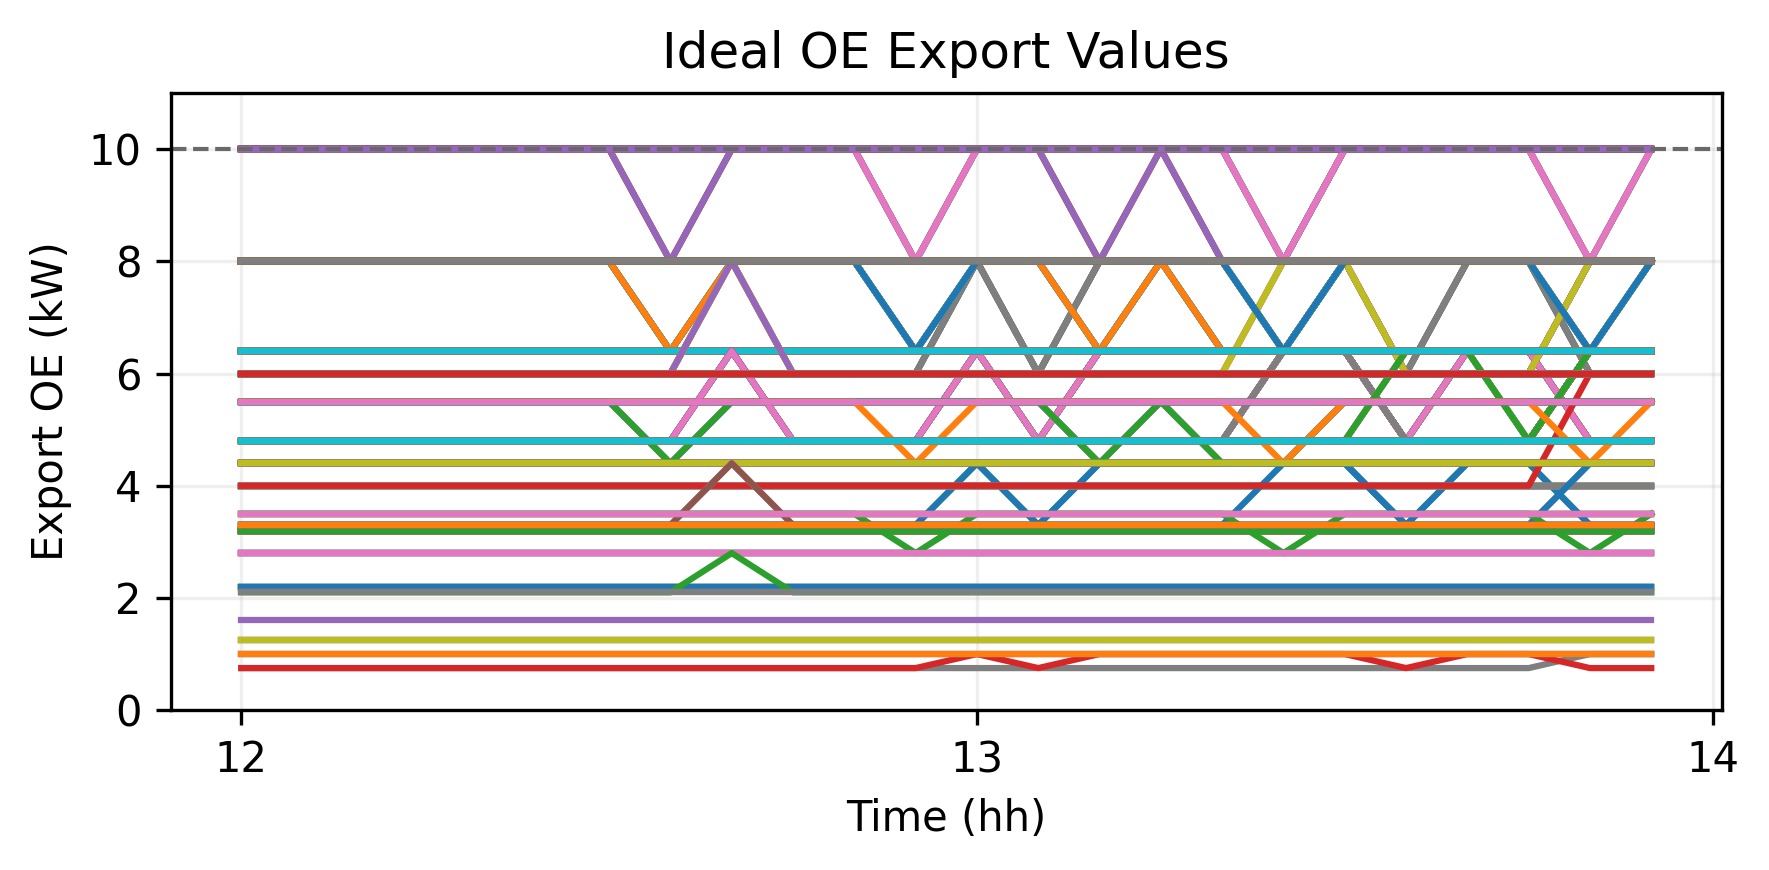

In [21]:
# ----------- Visualise the calculated Ideal OE ------------
plot_oe(
    ideal_oe_values=ideal_oe_prop_exp_values,
    title="Ideal OE Export Values",
    y_label="Export OE (kW)",
    value_limit=max_export_limit,
    init_hour_plt=12
)

#### Visualisation of the Calculated Ideal OE Import

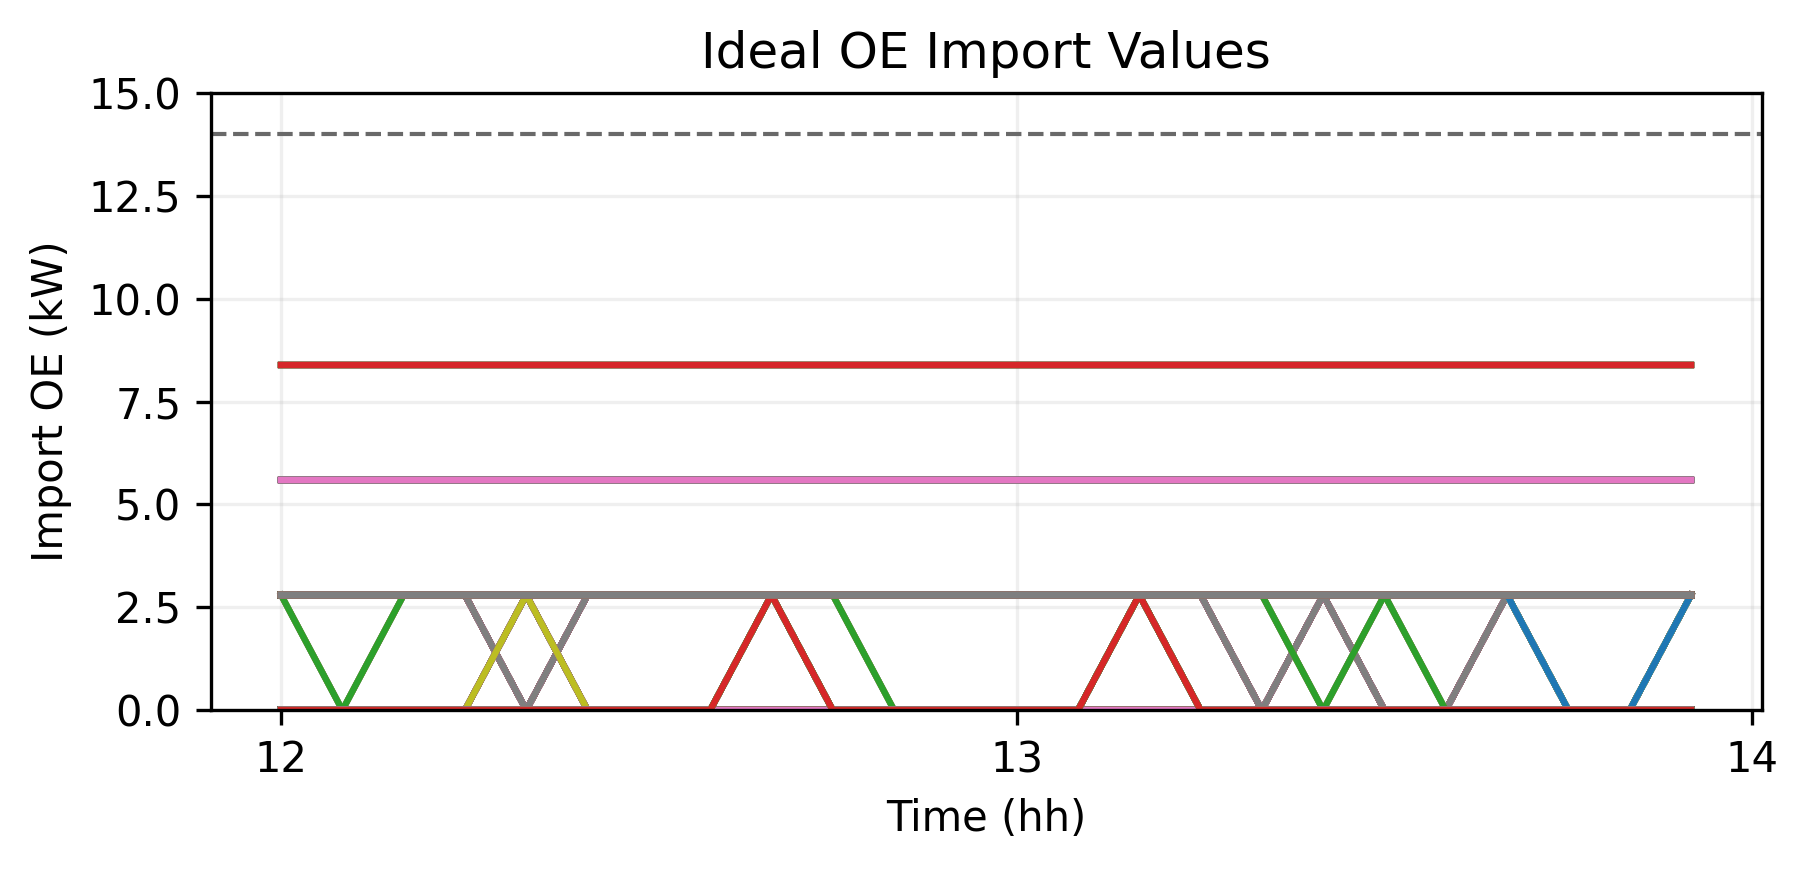

In [22]:
# ----------- Visualise the calculated Ideal OE ------------
plot_oe(
    ideal_oe_values=ideal_oe_prop_imp_values,
    title="Ideal OE Import Values",
    y_label="Import OE (kW)",
    value_limit=max_import_limit,
    init_hour_plt=12
)

### 5.6. Performance Check of the Calculated Ideal OE
The calculated OE is implemented in OpenDSS (proxy of real network) to check how it would perform in the real network. Then, a technical assessment of the simulation results is carried out.

In this sense, the code cell below is used to get the transformer and lines utilisation, and the voltages in each customer for the ideal OE values for exports and imports.

<span style="color:red">**<u>Note</u>.</span>** All flexible customers are assumed to be using the full available OE value calculated for them. So, it is the worst possible case.

In [23]:
# ----------- Initialise the network from OpenDSS ------------
network_data_exp_check = load_network()

# ----------- Check the performance of the calculated Ideal OE ------------
# Getting the transformer and lines utilisation, and the voltages in each customer
# for the exports
lv_tx_util_exp, lines_util_exp, all_voltage_profiles_exp = check_oe(network_data_exp_check, ideal_oe_prop_exp_values, direction = 'exports')
# for the imports
lv_tx_util_imp, lines_util_imp, all_voltage_profiles_imp = check_oe(network_data_exp_check, ideal_oe_prop_imp_values, direction = 'imports')

Simulation finished for the exports. The performance metrics were saved and they can be visualised in the code cells below.
Simulation finished for the imports. The performance metrics were saved and they can be visualised in the code cells below.


####  5.6.1.Technical Assessment of the Calculated Ideal OE Export

##### 5.6.1.1. Voltage Profiles in the Customers (Exports)

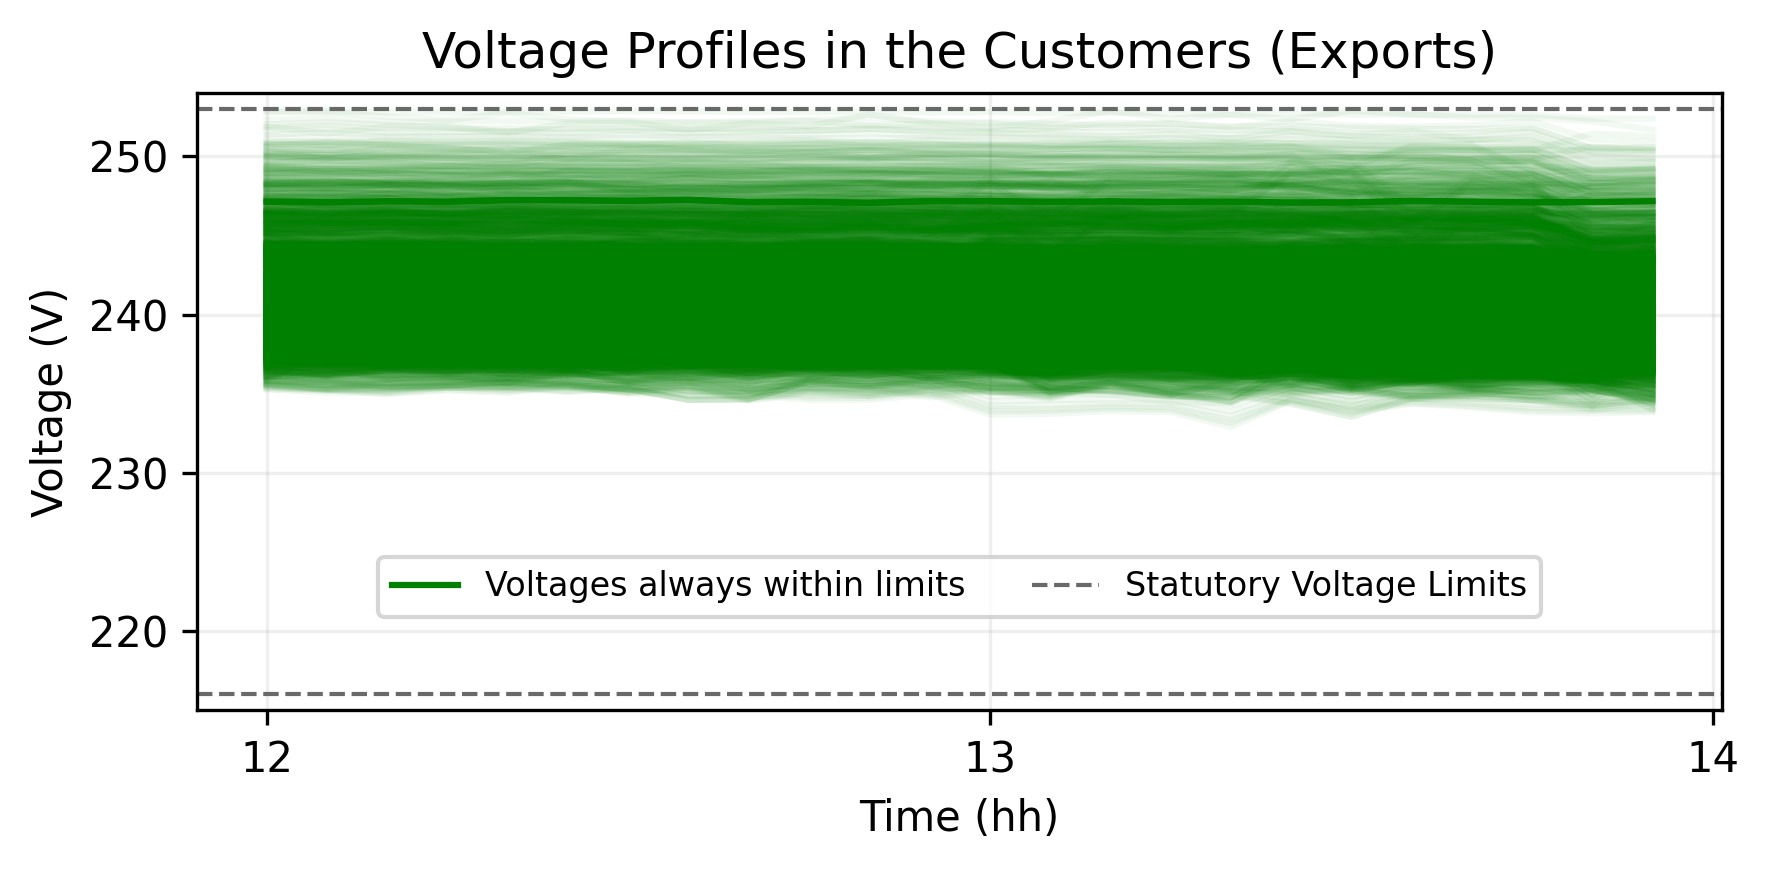

In [24]:
# Plot the voltage profiles in the customers
plot_voltage_profiles(all_voltage_profiles_exp, title = 'Voltage Profiles in the Customers (Exports)', init_hour_plt = 12)

# TODO: Compliance Voltage

##### 5.6.1.2. Distribution Transformer Utilisation (Exports)

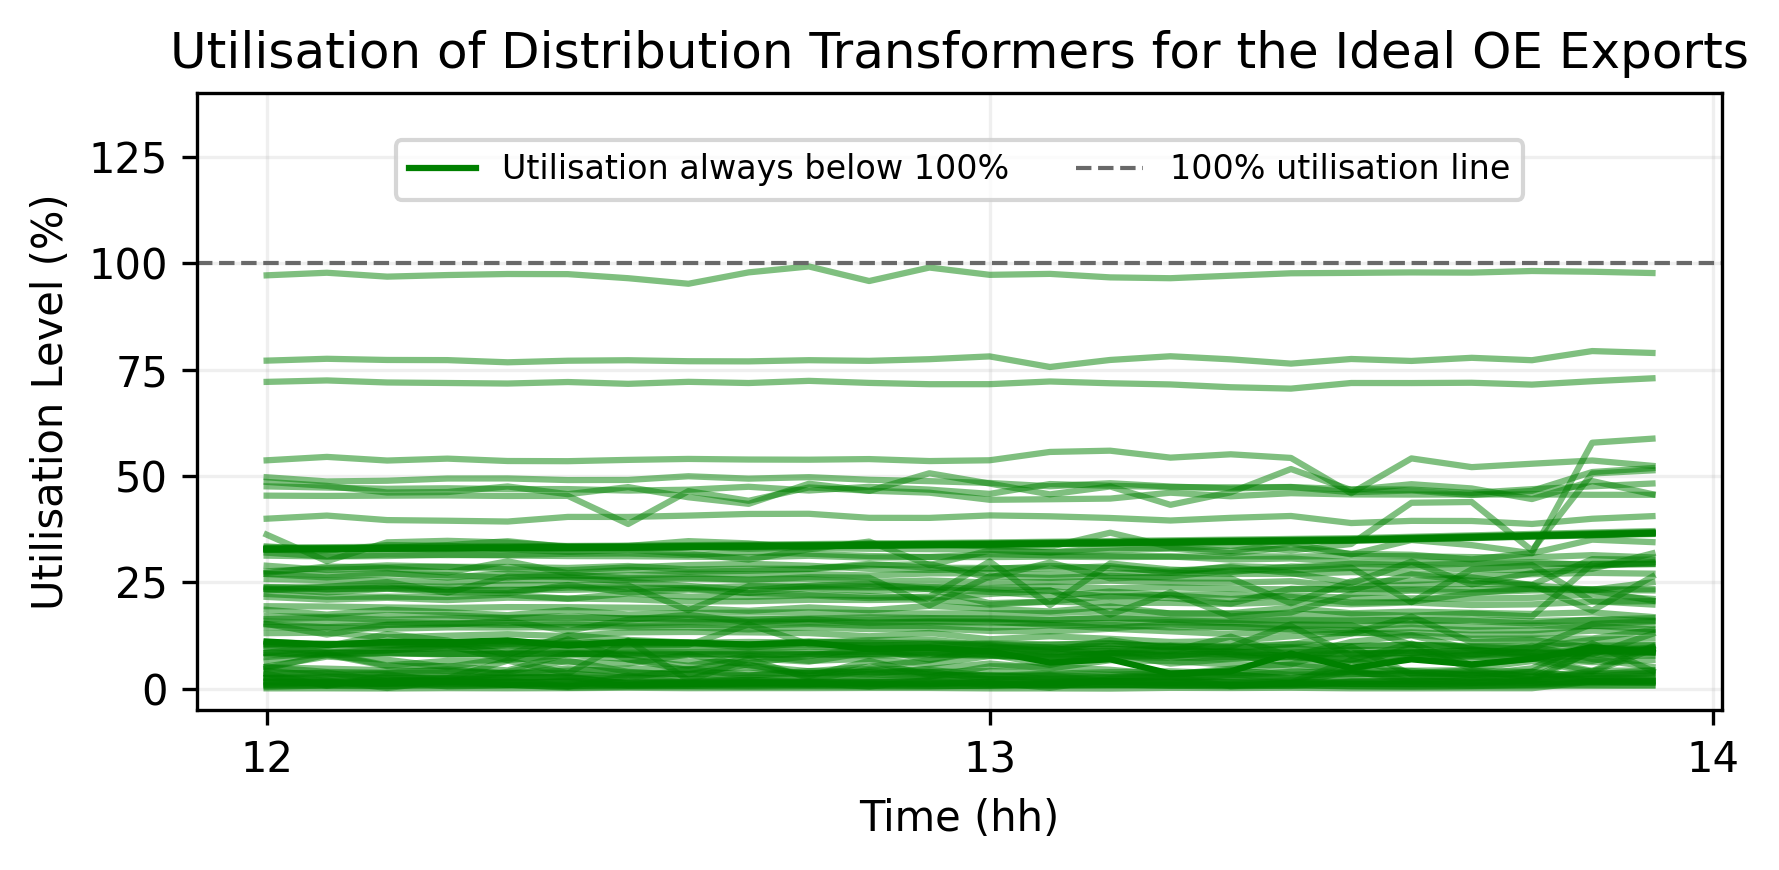

In [25]:
plot_utilisation(lv_tx_util_exp, title = 'Utilisation of Distribution Transformers for the Ideal OE Exports', init_hour_plt = 12, element='transformers')

##### 5.6.1.3. Line Utilisation (Exports)

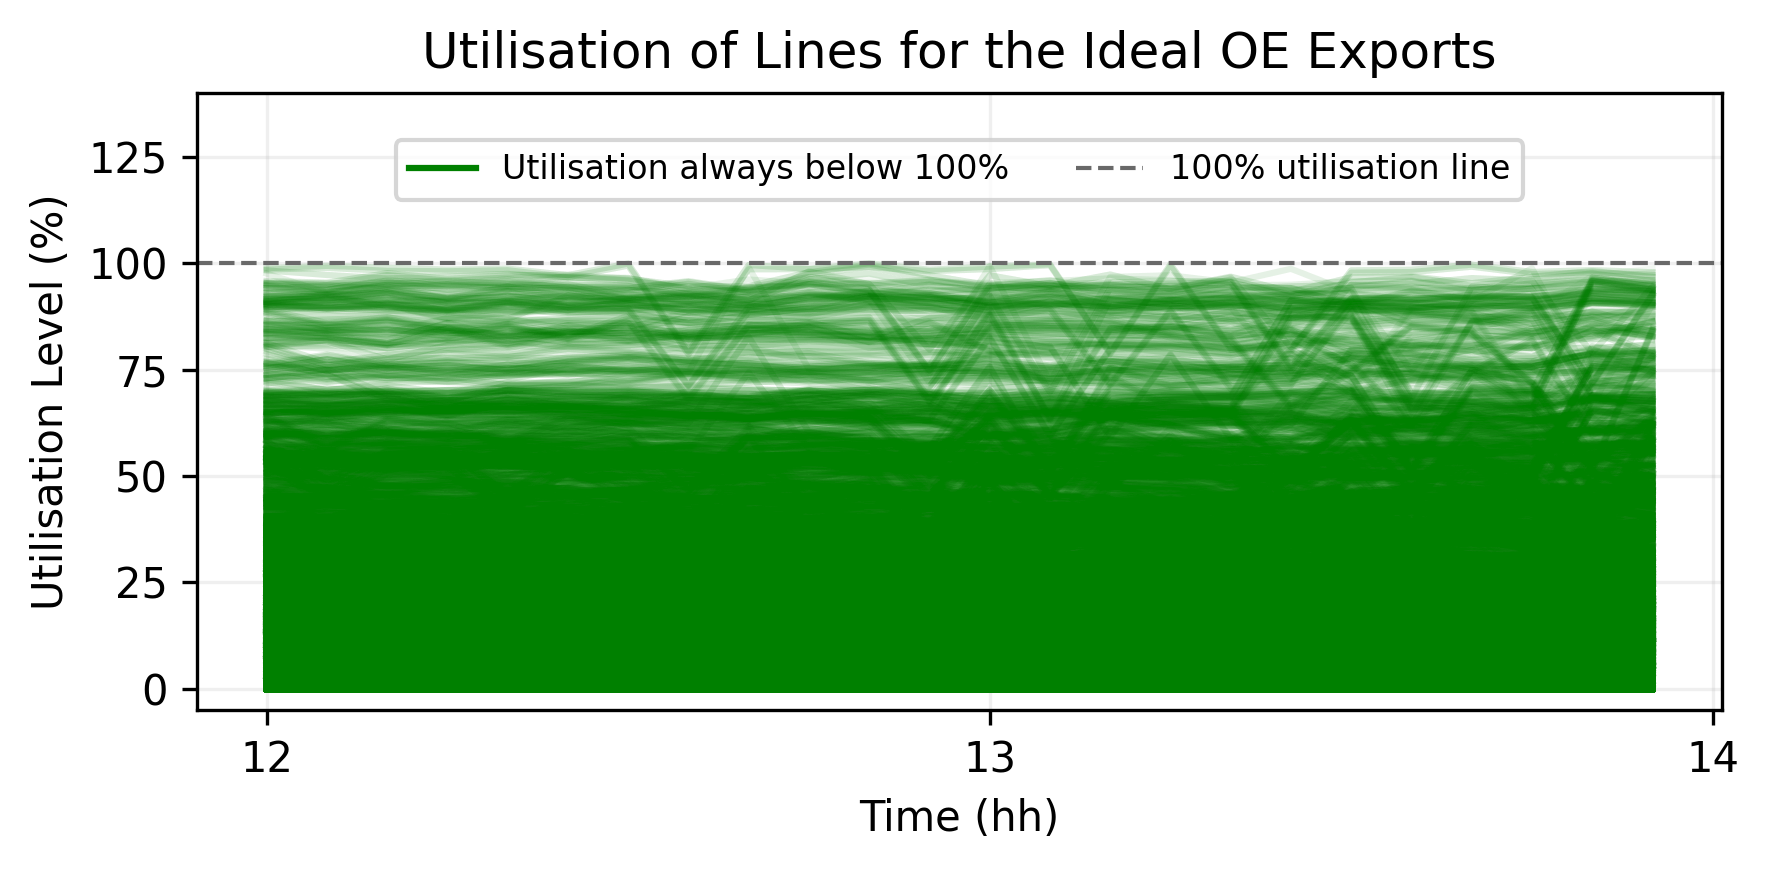

In [26]:
plot_utilisation(lines_util_exp, title = 'Utilisation of Lines for the Ideal OE Exports', init_hour_plt = 12, element='lines')

#### 5.6.2. Technical Assessment of the Calculated Ideal OE import

##### 5.6.2.1. Voltage Profiles in the Customers (Imports)

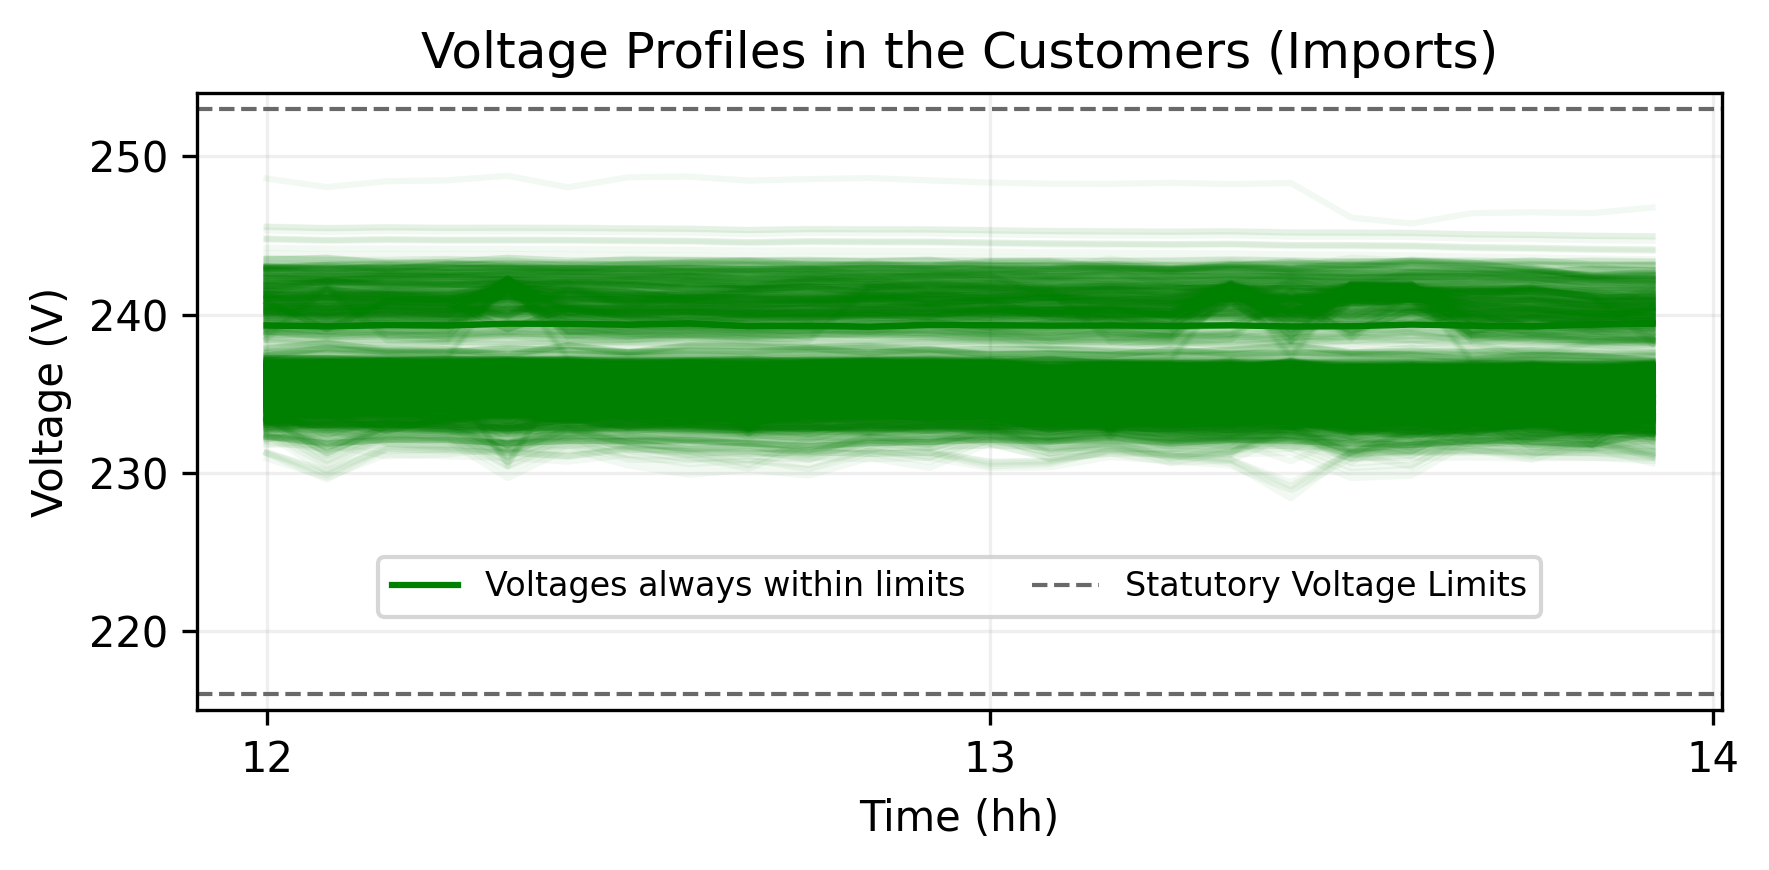

In [27]:
# Plot the voltage profiles in the customers
plot_voltage_profiles(all_voltage_profiles_imp, title = 'Voltage Profiles in the Customers (Imports)', init_hour_plt = 12)

# TODO: Compliance Voltage

##### 5.6.2.2. Distribution Transformer Utilisation (Imports)

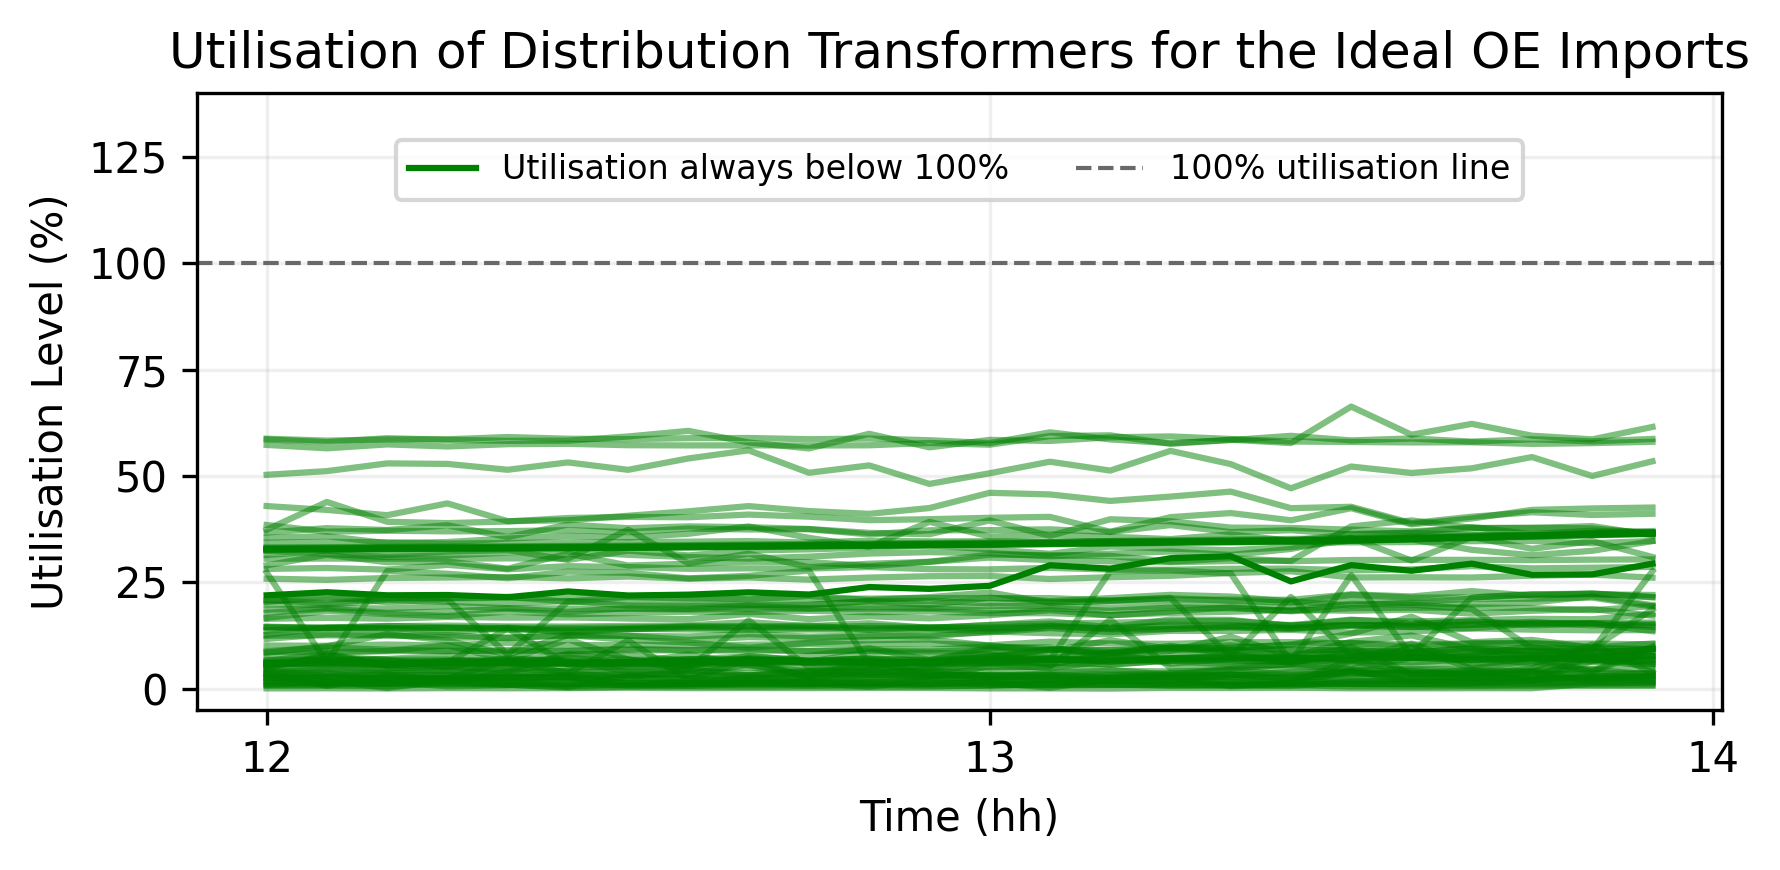

In [28]:
plot_utilisation(lv_tx_util_imp, title = 'Utilisation of Distribution Transformers for the Ideal OE Imports', init_hour_plt = 12, element='transformers')

##### 5.6.2.3. Line Utilisation (Imports)

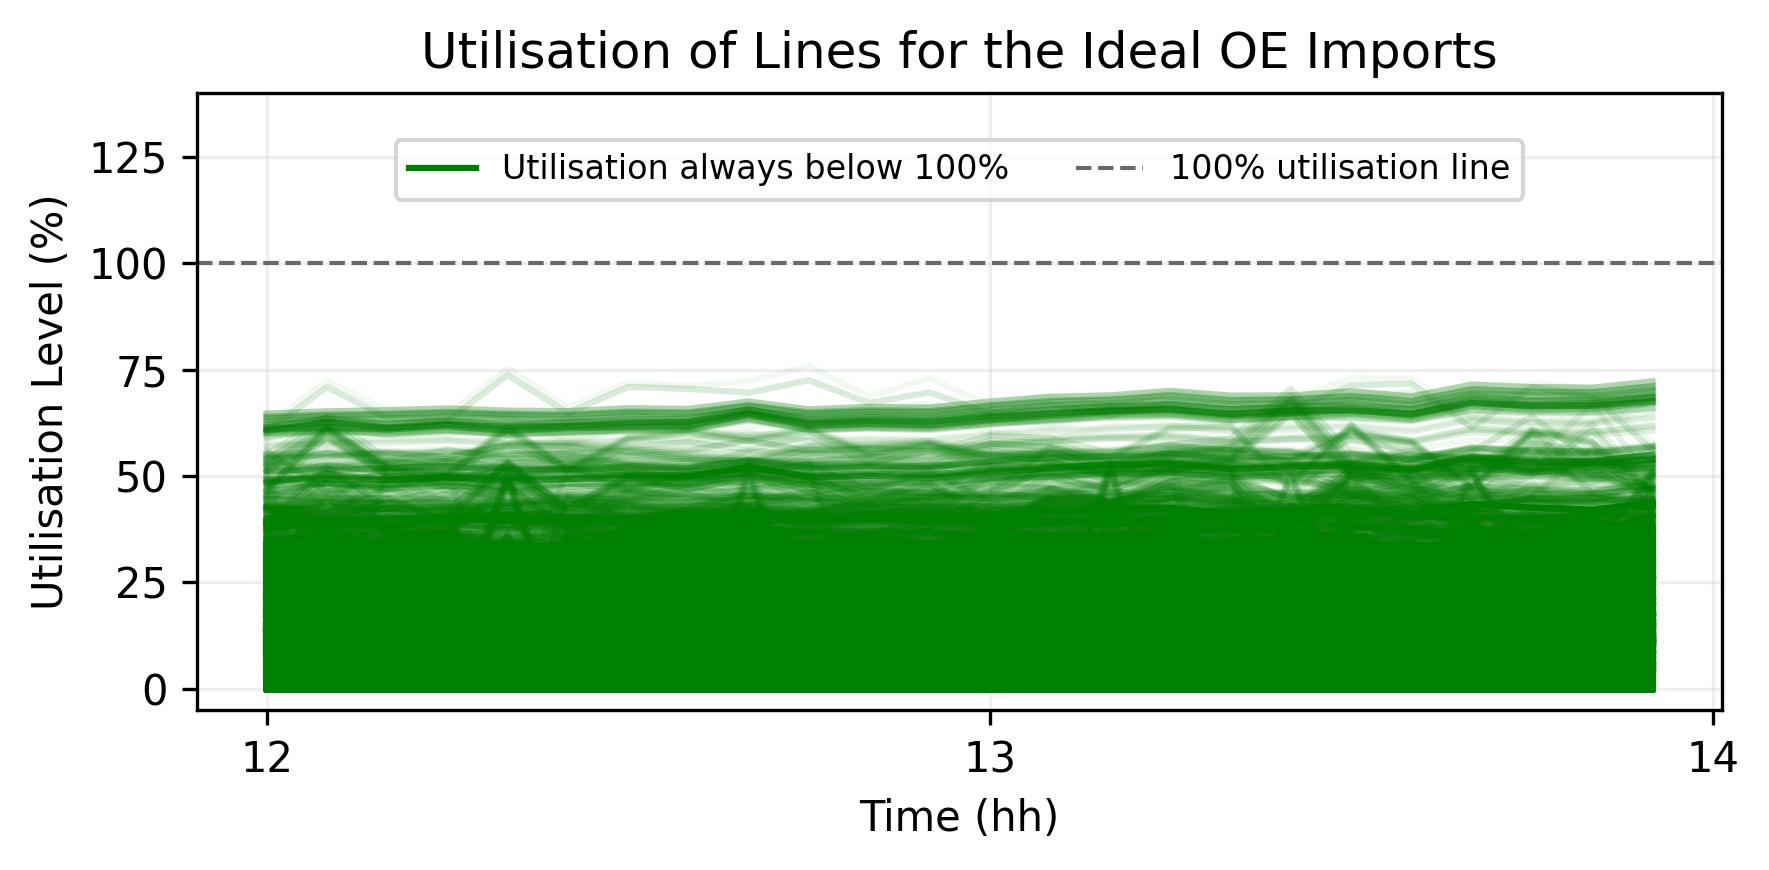

In [29]:
plot_utilisation(lines_util_imp, title = 'Utilisation of Lines for the Ideal OE Imports', init_hour_plt = 12, element='lines')

<span style="color:red">**<u>Note 1</u>.</span>** These metrics can be used to do comparisons with other OE implementations, but not all metrics used in the project are calculated here. For a complete performance analysis please refer to the final report of the project.

<span style="color:red">**<u>Note 2</u>.</span>** The default configuration for time steps and OE reduction step used here is different from the one used for the report. Here, these configurations were adapted to speed up the simulations. Note that you can reverse then to the original (same as in the report). For this, you should follow the instructions previously presented in this Jupyter notebook.